# Image Recognition using TensorFlow and Keras

This lab will help guide you in using TensorFlow and Keras. TensorFlow is an open source machine learning framework developed by Google. It similifies the process of building neural networks for deep learning. 

You can find additinal resources on using Tensorflow at https://www.tensorflow.org/

For this example we will use TensorFlow with the MNIST dataset. The MNIST dataset is database of handwritten digits. The associated number to each image is provided in the dataset. This problem is a multiclass classification which we will use TensorFlow to solve without the need to n-1 or n binary classification problems.

We start by importing TensorFlow libarary in python, given that it is installed. To install in Notebook type !pip install tensorflow. Additionally, we need to import Keras which is a high level API to build and train deep learning models.

In [1]:
# !pip install tensorflow

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

Now that we imported TensorFlow library and Keras, we can start using them. Keras contains a version of the MNIST dataset which we will use in this lab. The next cell will read the MNIST dataset.

In [3]:
data = tf.keras.datasets.mnist

After loading the data, we will split it into training and testing.

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data()

We will now plot the images to see what we are working with.

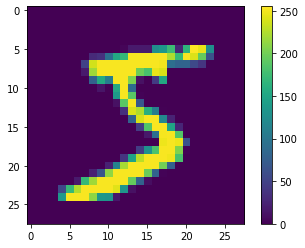

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We notice that the image is 255 x 255 pixels. As a result, we will scale the values to range between 0 and 1, and thus we will divide by 255.0.

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

We then check if our scaling worked.

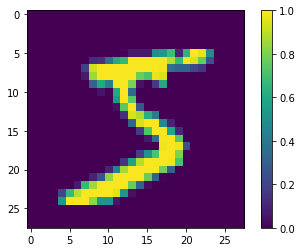

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before we build our deep learning model, let us explore what the data looks like. For that, we will plot our training images with their associated classes or digit.

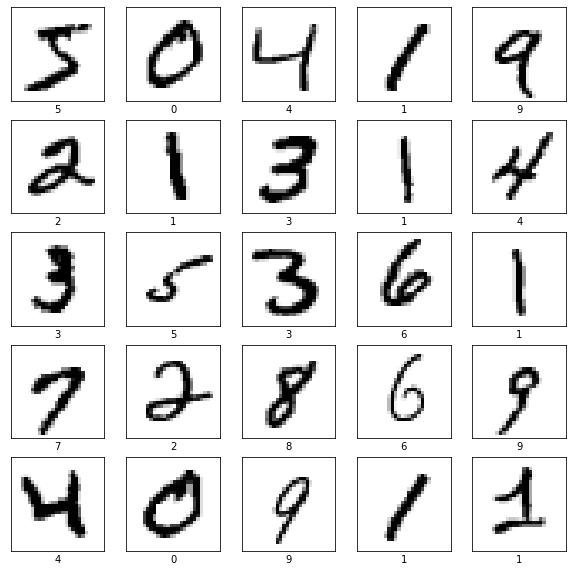

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Following our data exploration, we will now build our model which requires us to configure its layers, and then compile it. For this problem we will have 3 layers: an input layer, a hidden layer, and output layer. We will build a dense network, where all the neurons are connected to the next layer.

In [18]:
np.shape(x_train)

(60000, 28, 28)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer tf.keras.layers.Flatten converts the images from a 2d-array to a 1d-array of 28 * 28 = 784 pixels. Basically, we are unstacking rows of pixels and lining them up.</p>
<p>We then add two tf.keras.layers.Dense layers which are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second layer is a 10-node softmax layer representing the 10 classes.

Before we train our model, we need to compile it by defining our optimizer, loss function, and the metric used to monitor the training steps.

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

After compiling our model, we train the model with our training data and by defining the number of epochs.

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4321 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0738 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 2s 932us/step - loss: 0.0589 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.0464 - accuracy: 0.9861


You notice that for each epoch, the model prints out the accuracy while it trains. After done training, we will now evaluate our model on the test set.

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 836us/step - loss: 0.0775 - accuracy: 0.9778
Test accuracy: 0.9778000116348267


We notice that the accuracy of our training set is higher than that of the test set. This is an example of overfitting.

Now, let us take a look at what a neural network predicts.

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions[0]

array([4.6978440e-07, 3.6550279e-08, 5.5276691e-05, 4.1185808e-04,
       9.9389013e-12, 1.7722089e-08, 1.1291340e-13, 9.9949992e-01,
       8.1449849e-07, 3.1522544e-05], dtype=float32)

We can see the probabilities which the neural network output for our first prediction at all the output layers. To know which class it predicted we apply argmax to the outputs.

In [15]:
np.argmax(predictions[0])

7

We now validate what is the actual digit for the first test element.

In [16]:
y_test[0]

7

We now plot a sample of the test set with their respective predicted class and associated probability.

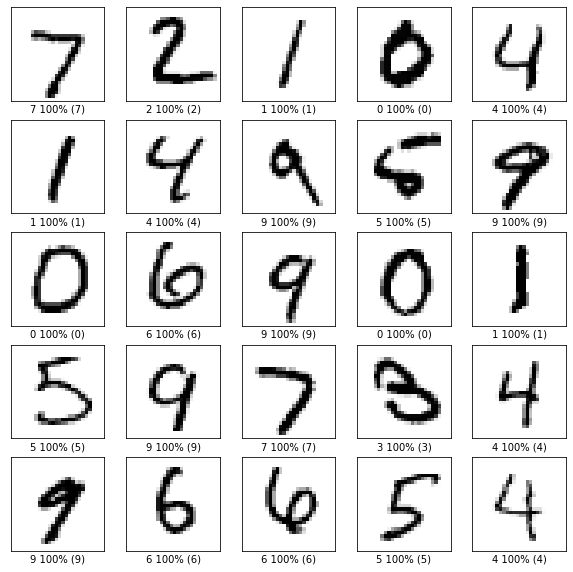

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), y_test[i]))
plt.show()

In this lab, we learned how to load a dataset from Keras, scale images, build a Convolutional Neural Network using TensorFlow and Keras, as well as evaluate a model based on test set.